## FIFO load balancer

In [1]:
import pandas as pd
import json
import os
import numpy as np

In [2]:
pathFIFO = '/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_FIFO'
pathPLANRGCN = '/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_PlanRGCN'

In [3]:
def extract_qs(path):
    qs = []
    for p in os.listdir(path):
        if p == "main.json":
            continue
        print(f"{path}/{p}")
        try:
            data = json.load(open(f"{path}/{p}",'r'))
            for q in data:
                q_data = json.loads(q['query'])
                for k in q_data.keys():
                    q[k] = q_data[k]
                q['ex_time'] = q['query_execution_end'] - q['query_execution_start']
                q['latency'] = q['query_execution_end'] - q['arrival_time']
                q['queue_wait_time'] = q['query_execution_start'] - q['queue_arrival_time']
                qs.append(q)
        except Exception as e:
            print(f"{path}/{p}")
    return qs
fifo = extract_qs(path)
qppBalance = extract_qs(path2)
data = {'FIFO Load Balancer':fifo, 'PlanRGCN Load Balancer':qppBalance}
len(fifo), len(qppBalance)

/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_FIFO/w_1.json
/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_FIFO/main_file.log
/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_FIFO/main_file.log
/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_FIFO/w_5.json
/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_FIFO/w_6.json
/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_FIFO/w_8.json
/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_FIFO/w_2.json
/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_FIFO/w_3.json
/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_FIFO/config.conf
/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_FIFO/config.conf
/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_FIFO/w_4.json
/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_FIFO/w_7.json
/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_PlanRGCN/main_file.log
/data/DBpedia2016_0_1_10_path_v3_weight

(683, 2460)

In [4]:
fifo[0]

{'query': '{"ID": "http://lsq.aksw.org/lsqQuery-ehEc4VXIyrW4-T2eIeEz_09lm6j_u8NtwGz0d69l1WoLIMIT", "text": "PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> SELECT DISTINCT ?y WHERE { ?x ?y ?z FILTER regex(?y, \\"karen\\") } ", "true_interval": "2"}',
 'start_time': 1706073198.1340263,
 'arrival_time': 1706073198.1446915,
 'queue_arrival_time': 1706073198.1847405,
 'query_execution_start': 1706073198.1860507,
 'query_execution_end': 1706074098.2916708,
 'execution_time': 900.1056201457977,
 'response': 'timed out',
 'ID': 'http://lsq.aksw.org/lsqQuery-ehEc4VXIyrW4-T2eIeEz_09lm6j_u8NtwGz0d69l1WoLIMIT',
 'text': 'PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> SELECT DISTINCT ?y WHERE { ?x ?y ?z FILTER regex(?y, "karen") } ',
 'true_interval': '2',
 'ex_time': 900.1056201457977,
 'latency': 900.1469793319702,
 'queue_wait_time': 0.001310110092163086}

In [5]:
print("Time outs")
print(f"FIFO LB Timeouts : {np.sum([1 for x in fifo if x['response'] == 'timed out'])}")
print(f"QPP LB Timeouts : {np.sum([1 for x in qppBalance if x['response'] == 'timed out'])}")

Time outs
FIFO LB Timeouts : 48
QPP LB Timeouts : 39


In [6]:
print("Good Queries")
print(f"FIFO LB Good Queries : {np.sum([1 for x in fifo if x['response'] == 'ok'])}")
print(f"QPP LB Good Queries : {np.sum([1 for x in qppBalance if x['response'] == 'ok'])}")

Good Queries
FIFO LB Good Queries : 635
QPP LB Good Queries : 2421


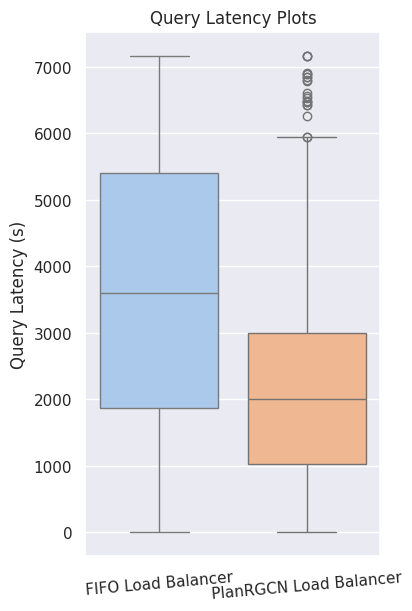

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette='pastel',color_codes = True)

def plot_box_latency(qpp_lb, lb, figsize=(4,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    ax = sns.boxplot(y=[q['latency'] for q in lb],x=['FIFO Load Balancer' for q in lb], ax=ax)
    ax = sns.boxplot(y=[q['latency'] for q in qpp_lb],x=['PlanRGCN Load Balancer' for q in qpp_lb], ax=ax)
    ax.set_ylabel('Query Latency (s)')
    ax.set_title("Query Latency Plots")
    ax.tick_params(axis='x', rotation=5)
    plt.show()
    
def plot_box_ex_time(qpp_lb, lb, figsize=(4,4)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    ax = sns.boxplot(y=[q['ex_time'] for q in lb],x=['FIFO Load Balancer' for q in lb], ax=ax)
    ax = sns.boxplot(y=[q['ex_time'] for q in qpp_lb],x=['PlanRGCN Load Balancer' for q in qpp_lb], ax=ax)
    ax.tick_params(axis='x', rotation=5)
    plt.show()
    
plot_box_latency(qppBalance, fifo)

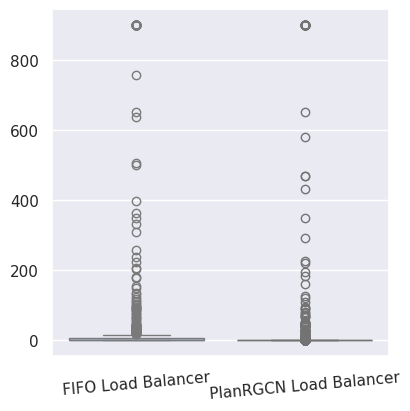

In [8]:
plot_box_ex_time(qppBalance, fifo)

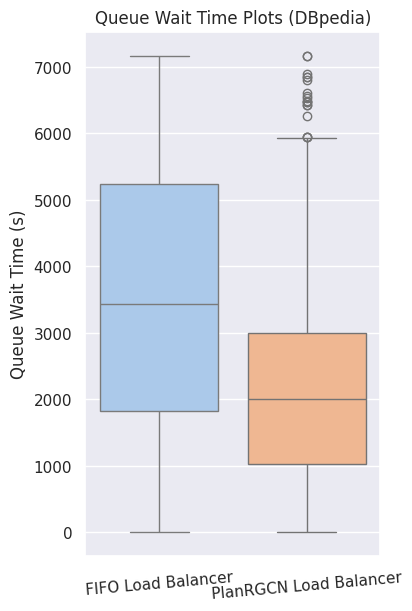

In [9]:
def plot_box_queu_wait_time(qpp_lb, lb, figsize=(4,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    ax = sns.boxplot(y=[q['queue_wait_time'] for q in lb],x=['FIFO Load Balancer' for q in lb], ax=ax)
    ax = sns.boxplot(y=[q['queue_wait_time'] for q in qpp_lb],x=['PlanRGCN Load Balancer' for q in qpp_lb], ax=ax)
    ax.set_ylabel('Queue Wait Time (s)')
    ax.set_title("Queue Wait Time Plots (DBpedia)")
    ax.tick_params(axis='x', rotation=5)
    plt.show()
plot_box_queu_wait_time(qppBalance, fifo)

In [10]:
print(f"Average Queue Wait Time QPP LB {np.mean([x['queue_wait_time'] for x in qppBalance])}")
print(f"Average Queue Wait Time FIFO LB {np.mean([x['queue_wait_time'] for x in fifo])}")

Average Queue Wait Time QPP LB 1969.4744183110997
Average Queue Wait Time FIFO LB 3519.1463691277177


FIFO __________
25%  0.9970270266118308
mean  0.9522687486120168
75%  0.9999868780134761
PlanRGCN __________
25%  0.999809793435364
mean  0.9501607265862416
75%  0.9999871648938317


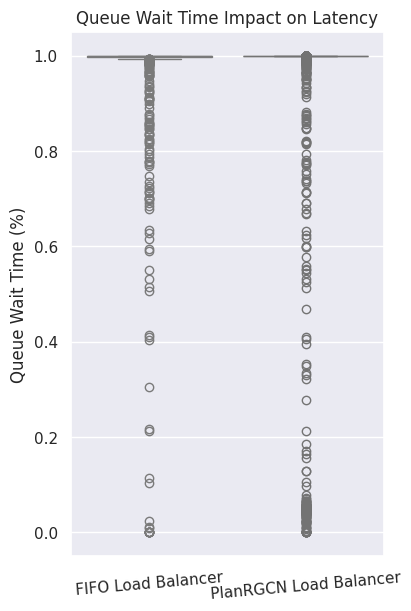

In [11]:
def plot_box_queu_wait_time_percentage(qpp_lb, lb, figsize=(4,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    fifo_queu_wait_time = [q['queue_wait_time']/q['latency'] for q in lb]
    print('FIFO __________')
    print("25% ",np.quantile(fifo_queu_wait_time,q=0.25))
    print("mean ", np.mean(fifo_queu_wait_time))
    print("75% ", np.quantile(fifo_queu_wait_time,q=0.75))
    qpp_queu_wait_time = [q['queue_wait_time']/q['latency'] for q in qpp_lb]
    print('PlanRGCN __________')
    print("25% ",np.quantile(qpp_queu_wait_time,q=0.25))
    print("mean ", np.mean(qpp_queu_wait_time))
    print("75% ", np.quantile(qpp_queu_wait_time,q=0.75))
    ax = sns.boxplot(y=fifo_queu_wait_time,x=['FIFO Load Balancer' for q in lb], ax=ax)
    ax = sns.boxplot(y=qpp_queu_wait_time, x=['PlanRGCN Load Balancer' for q in qpp_lb], ax=ax)
    ax.set_ylabel('Queue Wait Time (%)')
    ax.set_title("Queue Wait Time Impact on Latency")
    ax.tick_params(axis='x', rotation=5)
    plt.show()
plot_box_queu_wait_time_percentage(qppBalance, fifo)

In [12]:
def calculate_total_latency(qs):
    sum = 0
    for q in qs:
        sum += q['latency']
    return sum
lat_total_fifo = calculate_total_latency(fifo)
lat_total_qpp = calculate_total_latency(qppBalance)
lat_total_fifo, lat_total_qpp

(2458079.5938515663, 4887500.552989244)

In [13]:
lat_total_fifo/len(fifo), lat_total_qpp/len(qppBalance)

(3598.94523257916, 1986.7888426785546)

In [14]:
avg_fifo =lat_total_fifo/len(fifo)
avg_qpp = lat_total_qpp/len(qppBalance)
relative_impro = ((lat_total_qpp-lat_total_fifo)/lat_total_fifo)*100
relative_impro

98.83410468946683

In [15]:
((lat_total_fifo-lat_total_qpp)/lat_total_qpp)*100

-49.706817069346826

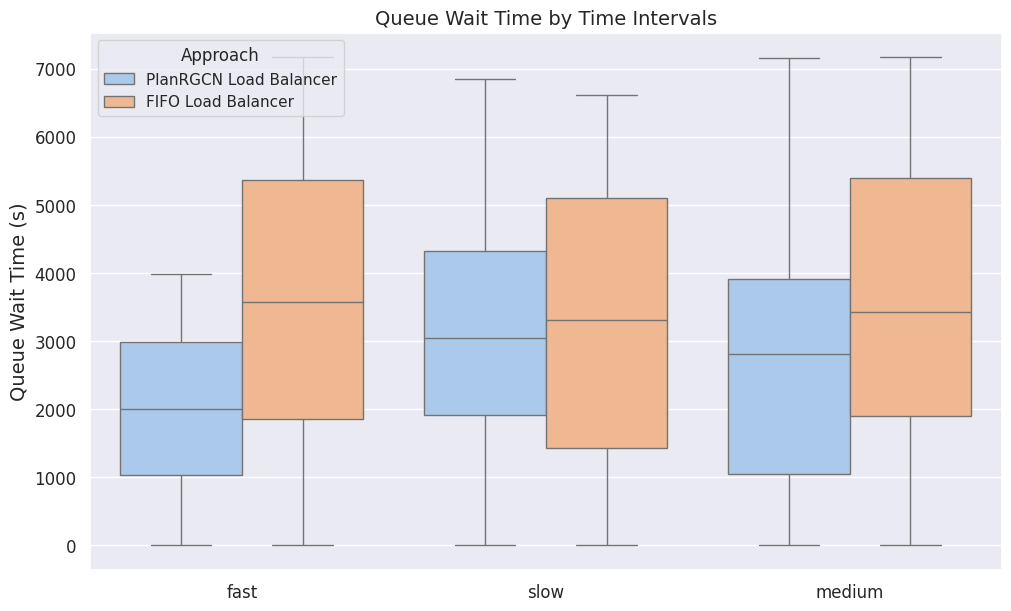

In [16]:
import pandas as pd

def plot_box_queu_wait_time_int(qpp_lb, lb, figsize=(4,6)):
    load_balancer = []
    que_w_time = []
    runtime_interval = []
    for q in qpp_lb:
        load_balancer.append('PlanRGCN Load Balancer')
        que_w_time.append(q['queue_wait_time'])
        match q['true_interval']:
            case '0':
                runtime_interval.append('fast')
            case '1':
                runtime_interval.append('medium')
            case '2':
                runtime_interval.append('slow')
    for q in lb:
        load_balancer.append('FIFO Load Balancer')
        que_w_time.append(q['queue_wait_time'])
        match q['true_interval']:
            case '0':
                runtime_interval.append('fast')
            case '1':
                runtime_interval.append('medium')
            case '2':
                runtime_interval.append('slow')
    df = pd.DataFrame.from_dict({'Approach': load_balancer, 'Runtime Interval':runtime_interval, 'queue wait time':que_w_time})
    figsize=(10,6)
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    ax.tick_params(axis='x', rotation=0)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax = sns.boxplot(x='Runtime Interval',y='queue wait time',data=df,hue='Approach', ax =ax)
    ax.set_xlabel("")
    ax.set_title('Queue Wait Time by Time Intervals', fontsize=14)
    ax.set_ylabel("Queue Wait Time (s)", fontsize=14)
    
plot_box_queu_wait_time_int(qppBalance, fifo)